In [1]:
import os 
import cv2
import numpy as np

In [2]:
import Augmentor

In [83]:
image = cv2.imread("himansu_iit_aug\\iit_001_02_L.bmp")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# noise = np.random.normal(0, 0.35, image.shape).astype(np.uint8)
noise = 50
blur_image = cv2.add(image, noise)

# Convert BGR to RGB
blur_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB)

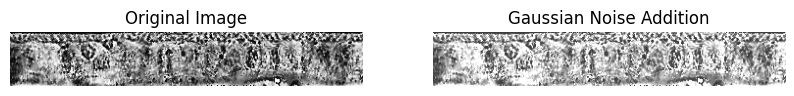

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot blurred image
plt.subplot(1, 2, 2)
plt.imshow(blur_image)
plt.title('Gaussian Noise Addition')
plt.axis('off')

plt.show()

In [21]:
plt.savefig("Gaussian_.png")

<Figure size 640x480 with 0 Axes>

In [4]:
import random

def augment_image(image_path, output_folder, num_variations=10):
    # Load the image
    image = cv2.imread(image_path)

    # Create output directory if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the file name and extension
    file_name, ext = os.path.splitext(os.path.basename(image_path))

    # Define augmentation functions
    augmentation_functions = [
        rotate,
        add_gaussian_noise,
        adjust_contrast,
        translate
    ]

    # Perform augmentation and save variations
    for i in range(1, num_variations + 1):
        augmented_image = image.copy()

        # Shuffle the list of augmentation functions
        random.shuffle(augmentation_functions)

        # Apply augmentations in random order
        for augmentation_function in augmentation_functions:
            augmented_image = augmentation_function(augmented_image)

        # Save the augmented image
        output_path = os.path.join(output_folder, f"{file_name}_aug{i}{ext}")
        cv2.imwrite(output_path, augmented_image)

def rotate(image):
    angle = np.random.randint(-2, 2)
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

def add_gaussian_noise(image):
    noise = np.random.normal(0, 0.35, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def adjust_contrast(image):
    alpha = np.random.uniform(0.8, 1.2)
    beta = np.random.randint(-20, 21)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def apply_gaussian_blur(image):
    blur_amount = np.random.randint(1, 3)  # Adjust the kernel size based on your preference
    return cv2.GaussianBlur(image, (blur_amount, blur_amount), 0)

def translate(image):
    tx = np.random.randint(-5, 6)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, 0]])
    return cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

if __name__ == "__main__":
    input_folder = "himansu_iit"
    output_folder = "naya_test_him_iit"
    person_ids = set()
    for filename in os.listdir(input_folder):
        person_id = filename.split("_")[1]
        person_ids.add(person_id)
    for person_id in person_ids:
        # Group the files by person ID
        person_images = [f for f in os.listdir(input_folder) if f.split("_")[1] == person_id]

        # Randomly select two images from the person's images
        selected_images = random.sample(person_images, min(2, len(person_images)))
        for image_file in selected_images:
            image_path = os.path.join("himansu_iit", image_file)
            augment_image(image_path, output_folder, num_variations=3)


In [46]:

# def augment_image(image_path, output_folder, num_variations=10):
#     # Load the image
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Create output directory if it doesn't exist
#     os.makedirs(output_folder, exist_ok=True)

#     # Get the file name and extension
#     file_name, ext = os.path.splitext(os.path.basename(image_path))

#     # Perform augmentation and save variations
#     for i in range(1, num_variations + 1):
#         augmented_image = image.copy()

#         angle = np.random.randint(-2, 2)
#         rows, cols = augmented_image.shape[:2]
#         rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
#         augmented_image = cv2.warpAffine(augmented_image, rotation_matrix, (cols, rows))

#         # adding Gaussian noise
#         noise = np.random.normal(0, 0.35, augmented_image.shape).astype(np.uint8)
#         augmented_image = cv2.add(augmented_image, noise)
        
#         # Contrast adjustment 
#         alpha = np.random.uniform(0.8, 1.2)
#         beta = np.random.randint(-20, 21)
#         augmented_image = cv2.convertScaleAbs(augmented_image, alpha=alpha, beta=beta)
        
#         # Gaussian blur
#         blur_amount = np.random.randint(1, 3)  # Adjust the kernel size based on your preference
#         augmented_image = cv2.GaussianBlur(augmented_image, (blur_amount, blur_amount), 0)
#         # translation
#         tx = np.random.randint(-5, 6)
#         translation_matrix = np.float32([[1, 0, tx], [0, 1, 0]])
#         augmented_image = cv2.warpAffine(augmented_image, translation_matrix, (cols, rows))

#         # # Save the augmented image
#         output_path = os.path.join(output_folder, f"{file_name}_aug{i}{ext}")
#         cv2.imwrite(output_path, augmented_image)
        

# if __name__ == "__main__":
#     image_path = "test/003_3.bmp"
#     output_folder = "test_output"
#     augment_image(image_path, output_folder, num_variations=10)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:1835: error: (-215:Assertion failed) ((map1.type() == CV_32FC2 || map1.type() == CV_16SC2) && map2.empty()) || (map1.type() == CV_32FC1 && map2.type() == CV_32FC1) in function 'cv::remap'


In [8]:


# # Build a new pipeline for image processing.
# p = Augmentor.Pipeline(
#     source_directory="test",
#     output_directory="test_output")

# # Manipulate the example card.
# p.rotate(
#     probability=.5,
#     max_left_rotation=2,
#     max_right_rotation=2,)
# # p.zoom(
# #     probability=.3,
# #     min_factor=.8,
# #     max_factor=1.1)
# # p.skew(
# #     probability=.3,
# #     magnitude=.15)
# # p.random_brightness(
# #     probability=.5,
# #     min_factor=.5,
# #     max_factor=1.75)

# # Generate and save 100 new images to the output directory.
# def custom_naming():
#     return "custom_name_{}".format(p.augmentor_images.index + 1)
# p.set_name_format(custom_naming)
# p.sample(10)

Initialised with 1 image(s) found.
Output directory set to test\test_output.

AttributeError: 'Pipeline' object has no attribute 'set_name_format'

In [9]:
# from PIL import Image
# import os

# def augment_data(input_dir, num_samples):
#     """
#     Perform data augmentation on images in the input directory and return augmented images.

#     Parameters:
#         input_dir (str): Path to the input directory containing original images.
#         num_samples (int): Number of augmented samples to generate for each original image.

#     Returns:
#         augmented_images (list): List of augmented images as numpy arrays.
#     """
#     # Initialize Augmentor pipeline
#     try:
#         # Initialize Augmentor pipeline
#         p = Augmentor.Pipeline(input_dir)

#         # Add augmentation operations
#         p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#         # p.flip_left_right(probability=0.5)
#         # p.flip_top_bottom(probability=0.5)
#         # p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
#         # p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
#         # p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.5)
#         # p.random_color(probability=0.5, min_factor=0.5, max_factor=1.5)
#         # p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
#         # p.random_blur(probability=0.5, min_sigma=0.1, max_sigma=3)
#         # p.random_noise(probability=0.5, min_factor=0.01, max_factor=0.1)

#         # Sample augmented images
#         augmented_images = []
#         for _ in range(num_samples):
#             augmented_images.append(np.array(p.sample(1)[0]))

#         return augmented_images
    
#     except Exception as e:
#         print("Error occurred during augmentation:", e)
#         return []

# # Example usage for testing a single image
# input_directory = "test"
# num_samples_per_image = 5

# # Get augmented images
# augmented_images = augment_data(input_directory, num_samples_per_image)

# # Print augmented images (in this example, just the first augmented image)
# for i, img in enumerate(augmented_images):
#     print(f"Augmented image {i+1}:")
#     Image.fromarray(img).show()  # Display image (requires PIL)


Initialised with 1 image(s) found.
Output directory set to test\output.

Processing <PIL.BmpImagePlugin.BmpImageFile image mode=L size=432x48 at 0x2050A635E50>: 100%|██████████| 1/1 [00:00<00:00, 71.05 Samples/s]

Error occurred during augmentation: 'NoneType' object is not subscriptable


In [2]:
# import os

# def augment_data(input_dir, output_dir, num_samples):
#     """
#     Perform data augmentation on images in the input directory and save augmented images to the output directory.

#     Parameters:
#         input_dir (str): Path to the input directory containing original images.
#         output_dir (str): Path to the output directory where augmented images will be saved.
#         num_samples (int): Number of augmented samples to generate for each original image.
#     """
#     # Initialize Augmentor pipeline
#     p = Augmentor.Pipeline(input_dir, output_directory=output_dir)

#     # Add augmentation operations
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     # p.flip_left_right(probability=0.5)
#     # p.flip_top_bottom(probability=0.5)
#     # p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
#     # p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
#     # p.random_brightness(probability=0.5, min_factor=0.5, max_factor=1.5)
#     # p.random_color(probability=0.5, min_factor=0.5, max_factor=1.5)
#     # p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
#     # p.random_blur(probability=0.5, min_sigma=0.1, max_sigma=3)
#     # p.random_noise(probability=0.5, min_factor=0.01, max_factor=0.1)

#     # Generate augmented samples
#     p.sample(num_samples)

# # Example usage
# input_directory = "path/to/original_images"
# output_directory = "path/to/augmented_images"
# num_samples_per_image = 5

# augment_data(input_directory, output_directory, num_samples_per_image)

